<a href="https://colab.research.google.com/github/rafarodriguero/dioCienciaDeDados/blob/main/Aula2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalhando com Planilhas do Excel

In [1]:
#importando o Pandas
import pandas as pd

In [2]:
#leitura dos arquivos

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
#juntandos os DFs
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
32,Fortaleza,2019-01-01,43.33,1004,4
165,Natal,2019-01-02,11.54,1037,1
72,Recife,2019-01-01,42.32,982,2
131,Natal,2019-01-02,63.48,1037,3
7,Fortaleza,2019-02-11,35.50,1003,2


In [9]:
df.shape

(894, 5)

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
df["LojaID"] = df["LojaID"].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [14]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#Tratamento de valores faltantes

In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [23]:
#Substituindo os valores nulos pela média (Nos arquivos que baixei não havia valores nulos)
#df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

#Substituir os valores nulos por zero
#df["Vendas"].fillna(0, inplace=True)

#Apagar os valores Nulos de qualquer coluna
#df.dropna(inplace=True)

#apagando as linhas com valores nulos com base apenas em 1 coluna
#df.dropna(subset=["Vendas"], inplace=True)

#Removendo linhas que estejam com valores faltantes em todas as colunas
#df.dropna(how="all", inplace=True)

In [17]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

###Criando Colunas novas

In [24]:
#Criando coluna de receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [25]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [26]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [27]:
df["Receita"].min()

3.34

In [28]:
#Retorna as 3 maiores valores
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [29]:
#Retorna as 3 menores valores
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [30]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
#Ordenar o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#Trabalhando com datas

In [32]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,1514764800000000000,142.00,1520,1,142.00,1.0
1,Aracaju,1514764800000000000,14.21,1522,6,85.26,6.0
2,Aracaju,1514764800000000000,71.55,1520,1,71.55,1.0
3,Aracaju,1514764800000000000,3.01,1521,7,21.07,7.0
4,Aracaju,1514764800000000000,24.51,1522,8,196.08,8.0


In [33]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [35]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [36]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [38]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [39]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018


In [40]:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1


In [41]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [45]:
#Calculando a diferença de dias

df["diferenca_dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
81,Aracaju,2018-01-01,53.41,1520,2,106.82,2.0,2018,1,1,0 days
60,Recife,2019-01-01,37.97,983,1,37.97,1.0,2019,1,1,365 days
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days
214,Natal,2019-01-02,54.94,1036,2,109.88,2.0,2019,1,2,366 days
117,Aracaju,2018-01-01,170.97,1521,4,683.88,4.0,2018,1,1,0 days


In [47]:
#Criando a colune de Trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
199,Natal,2019-01-02,153.87,1036,3,461.61,3.0,2019,1,2,366 days,1
222,Salvador,2019-01-02,43.96,1037,1,43.96,1.0,2019,1,2,366 days,1
30,Natal,2018-10-02,856.00,853,4,3424.00,4.0,2018,10,2,274 days,4
71,Natal,2019-03-20,840.00,854,3,2520.00,3.0,2019,3,20,443 days,1
56,Recife,2019-01-01,7.98,983,5,39.90,5.0,2019,1,1,365 days,1


In [48]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


#Visualização de dados

In [49]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

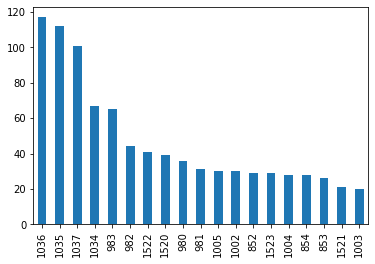

In [50]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

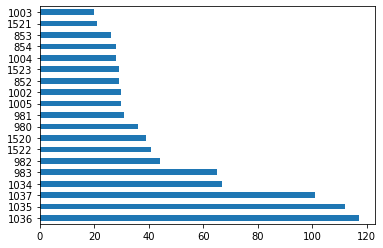

In [51]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

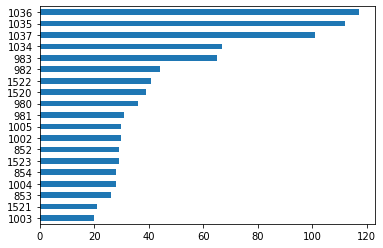

In [53]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

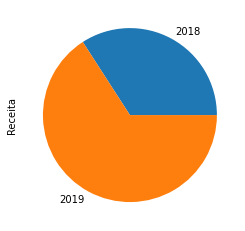

In [55]:
#Gráfico no formato de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [56]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

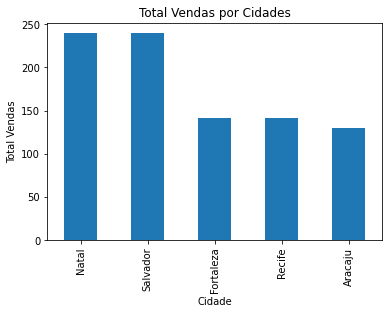

In [57]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidades")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

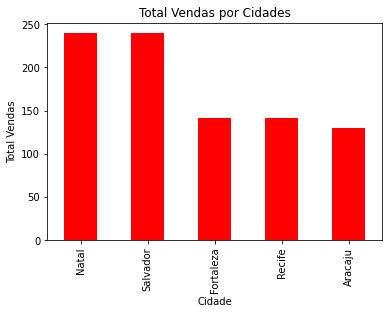

In [58]:
#Alterando a cor
import matplotlib.pyplot as plt

df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidades", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [59]:
#Alterando o estilo dos gráficos
plt.style.use("ggplot")

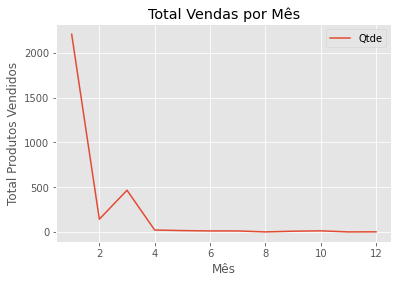

In [61]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Vendas por Mês");
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [62]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [67]:
df.columns

Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde', 'Receita',
       'Receita/Vendas', 'Ano_Venda', 'mes_venda', 'dia_venda',
       'diferenca_dias', 'trimestre_venda'],
      dtype='object')

In [69]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0,2019,1,3,367 days,1


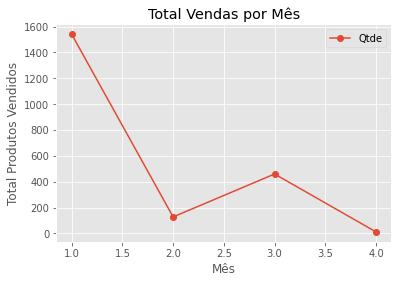

In [75]:
#Total de produtos vendidos por mês no ano de 2019
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="o", title="Total Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

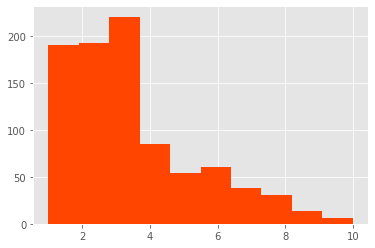

In [77]:
#Hisograma
plt.hist(df["Qtde"], color ="orangered");

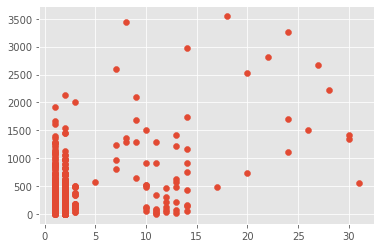

In [78]:
plt.scatter(x=df_2019["dia_venda"], y= df_2019["Receita"]);

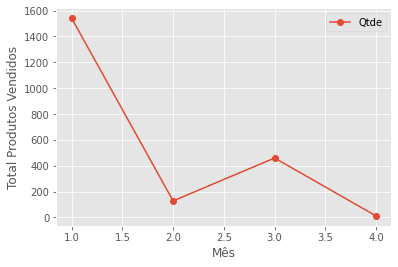

In [79]:
#Salvando o gráfico em PNG

df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="o")
plt.title=("Total Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")